In [1]:
import sys
sys.path.insert(1, '../')

from commonfunctions import *

In [26]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import skimage.io as IO
import cv2

In [39]:
def draw_landmarks_on_image(rgb_image, detection_result):
    face_landmarks_list = detection_result.face_landmarks
    annotated_image = np.copy(rgb_image)

    for idx in range(len(face_landmarks_list)):
        face_landmarks = face_landmarks_list[idx]

        face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        face_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
        ])

        # solutions.drawing_utils.draw_landmarks(
        #     image=annotated_image,
        #     landmark_list=face_landmarks_proto,
        #     connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        #     # landmark_drawing_spec=None,
        #     connection_drawing_spec=mp.solutions.drawing_styles
        #     .get_default_face_mesh_tesselation_style())
        # solutions.drawing_utils.draw_landmarks(
        #     image=annotated_image,
        #     landmark_list=face_landmarks_proto,
        #     connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        #     # landmark_drawing_spec=None,
        #     connection_drawing_spec=mp.solutions.drawing_styles
        #     .get_default_face_mesh_contours_style())
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks_proto,
            connections=mp.solutions.face_mesh.FACEMESH_IRISES,
            # landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles
            .get_default_face_mesh_iris_connections_style())

    return annotated_image

In [9]:
base_options = python.BaseOptions(model_asset_path='./face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)


def detect(path):
    image = mp.Image.create_from_file(path)

    detection_result = detector.detect(image)

    annotated_image = draw_landmarks_on_image(
        image.numpy_view(), detection_result)
    return annotated_image, detection_result

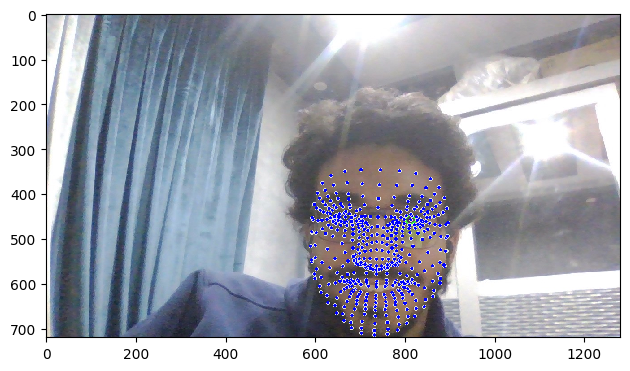

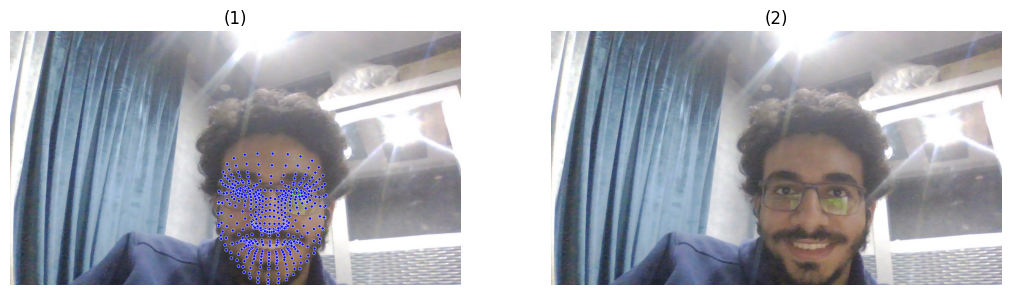

In [126]:
path = "E:\lenovo\Pictures\Camera Roll\WIN_20231212_22_50_46_Pro.jpg"
image, result = detect(path)
IO.imshow(image)
show_images([image, cv2.cvtColor(cv2.imread(path),cv2.COLOR_RGB2BGR)])
# plot_face_blendshapes_bar_graph(result.face_blendshapes[0])

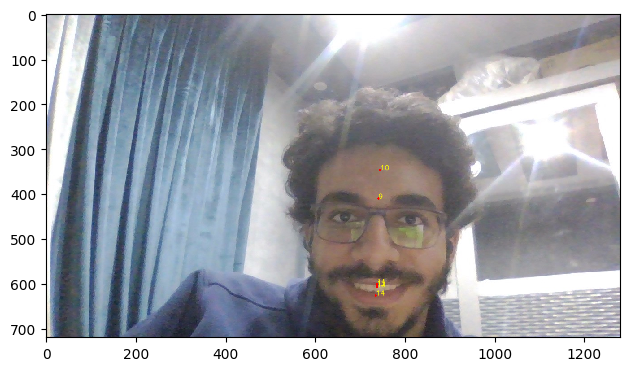

In [127]:
original_img=cv2.cvtColor(cv2.imread(path), cv2.COLOR_RGB2BGR)
height,width,channels=original_img.shape

fontFace = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.5
color = (255, 255, 0)
thickness = 1

for l,i in zip(result.face_landmarks[0][9:15],range(6)):
    x = int(l.x*width)
    y = int(l.y*height)

    cv2.circle(original_img, (x, y),1,(255,0,0),2)
    cv2.putText(original_img, str(i+9), (x, y), fontFace, fontScale,
                color, thickness, lineType=cv2.LINE_AA)
    
IO.imshow(original_img)

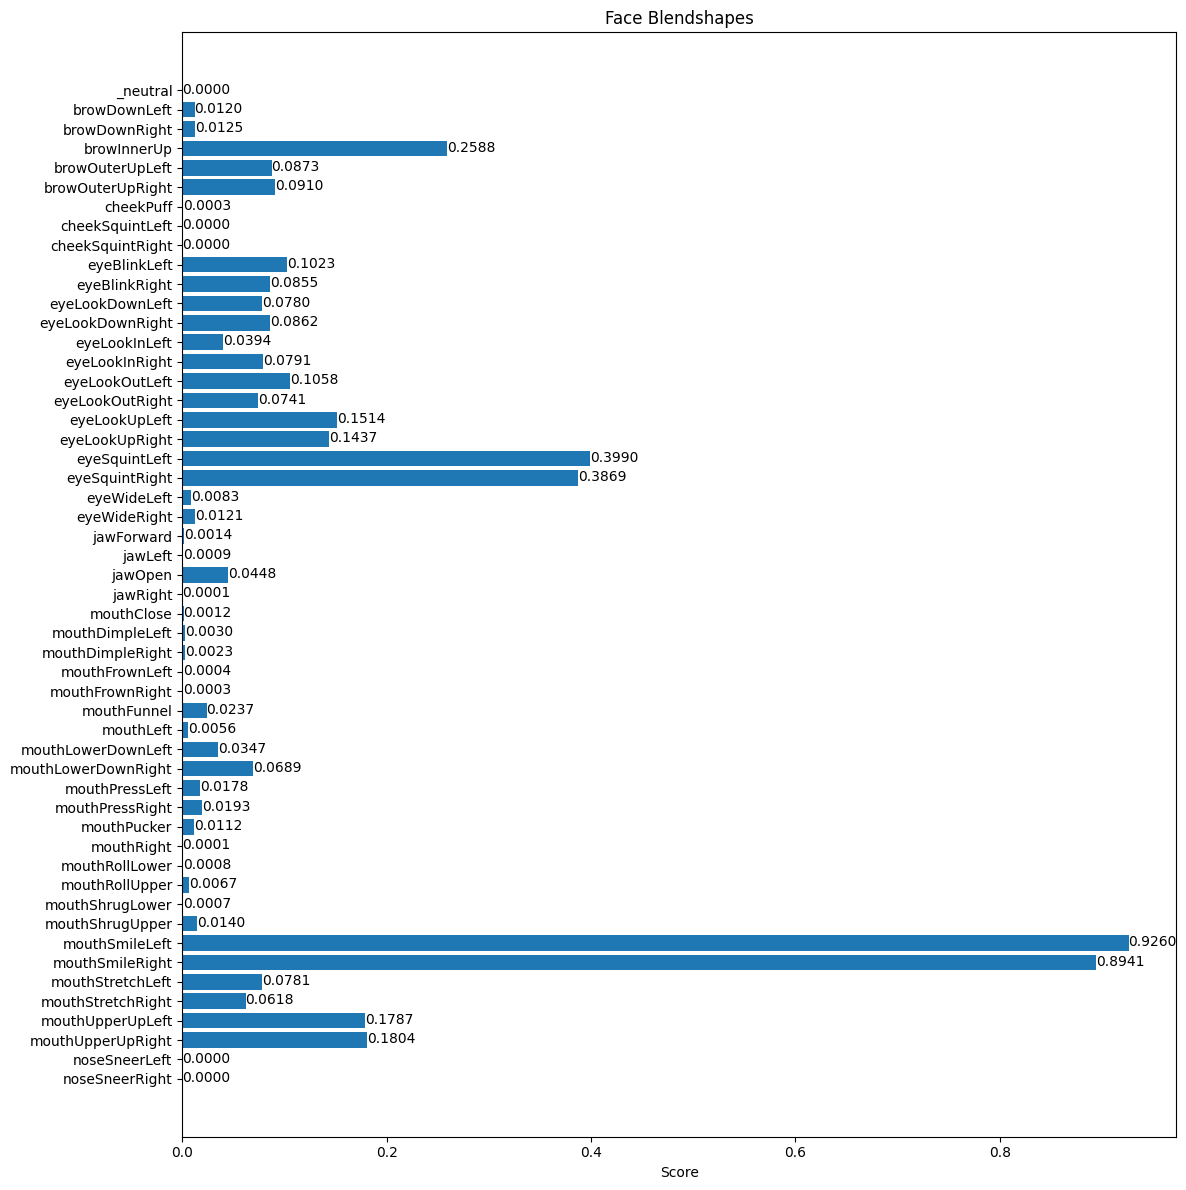

In [137]:
plot_face_blendshapes_bar_graph(result.face_blendshapes[0])

In [138]:
face_blendshapes_names = [
face_blendshapes_category.category_name for face_blendshapes_category in result.face_blendshapes[0]]
face_blendshapes_scores = [
face_blendshapes_category.score for face_blendshapes_category in result.face_blendshapes[0]]
face_blendshapes_ranks = range(len(face_blendshapes_names))

In [113]:
face_blendshapes_names[1]

'browDownLeft'

In [129]:
for i , b in zip(range(40,len(face_blendshapes_names)),face_blendshapes_names[40:]):
    print(f"{i} {b}")

40 mouthRollLower
41 mouthRollUpper
42 mouthShrugLower
43 mouthShrugUpper
44 mouthSmileLeft
45 mouthSmileRight
46 mouthStretchLeft
47 mouthStretchRight
48 mouthUpperUpLeft
49 mouthUpperUpRight
50 noseSneerLeft
51 noseSneerRight


In [139]:

needed_names = [face_blendshapes_names[i] for i in [1, 2, 3, 4, 5, 9, 10, 11,
                                                    12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 44, 45, 46, 47, 48, 49]]
needed_scores = [face_blendshapes_scores[i] for i in [1, 2, 3, 4, 5, 9, 10,
                                                      11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 44, 45, 46, 47, 48, 49]]
for name,score in zip(needed_names,needed_scores):
    print(f"{name}: {score}")

browDownLeft: 0.011991092935204506
browDownRight: 0.012487064115703106
browInnerUp: 0.2588391602039337
browOuterUpLeft: 0.0872654840350151
browOuterUpRight: 0.09104278683662415
eyeBlinkLeft: 0.10231085866689682
eyeBlinkRight: 0.08547359704971313
eyeLookDownLeft: 0.07797311991453171
eyeLookDownRight: 0.0862235352396965
eyeLookInLeft: 0.03944465517997742
eyeLookInRight: 0.07910219579935074
eyeLookOutLeft: 0.10578705370426178
eyeLookOutRight: 0.07410471886396408
eyeLookUpLeft: 0.15143577754497528
eyeLookUpRight: 0.1436730921268463
eyeSquintLeft: 0.39899206161499023
eyeSquintRight: 0.3868730962276459
eyeWideLeft: 0.008327099494636059
eyeWideRight: 0.012131537310779095
jawOpen: 0.0448189415037632
mouthSmileLeft: 0.9260051250457764
mouthSmileRight: 0.8941237926483154
mouthStretchLeft: 0.07807069271802902
mouthStretchRight: 0.061824966222047806
mouthUpperUpLeft: 0.17871502041816711
mouthUpperUpRight: 0.1803624927997589


In [144]:
path_to_data = "..\Data\Student-engagement-dataset\Engaged\cropped"

In [145]:
import os


def get_image_paths(root_folder, image_extensions=['jpg', 'jpeg', 'png', 'gif']):
    image_paths = []

    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_paths.append(root+"/"+file)

    return image_paths

In [146]:
import shutil
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [ ]:
needed_names = [face_blendshapes_names[i] for i in [1, 2, 3, 4, 5, 9, 10, 11,
                                                    12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 44, 45, 46, 47, 48, 49]]

In [148]:
person_file_names_dict = {}
data=[]
for img_dir in img_dirs:
    count = 0
    person_name = img_dir.split('\\')[-1]
    person_file_names_dict[person_name] = []

    for entry in get_image_paths(img_dir):

        image, result = detect(entry)

        if (len(result.face_blendshapes) < 1):
            continue

        face_blendshapes_scores = [
        face_blendshapes_category.score for face_blendshapes_category in result.face_blendshapes[0]]


        
        needed_scores = [face_blendshapes_scores[i] for i in [1, 2, 3, 4, 5, 9, 10,
                                                      11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 44, 45, 46, 47, 48, 49]]
        
        d = dict(zip(needed_names, needed_scores))
        d['engaged']=1
        d['path']=entry
        d['state']=person_name

        data.append(d)

In [152]:
data[0]

{'browDownLeft': 0.06464314460754395,
 'browDownRight': 0.0247036162763834,
 'browInnerUp': 0.05190223082900047,
 'browOuterUpLeft': 0.06759630143642426,
 'browOuterUpRight': 0.107756108045578,
 'eyeBlinkLeft': 0.1298646479845047,
 'eyeBlinkRight': 0.0555340051651001,
 'eyeLookDownLeft': 0.17746305465698242,
 'eyeLookDownRight': 0.16022002696990967,
 'eyeLookInLeft': 0.09051889181137085,
 'eyeLookInRight': 0.041288793087005615,
 'eyeLookOutLeft': 0.0561978779733181,
 'eyeLookOutRight': 0.10958606749773026,
 'eyeLookUpLeft': 0.04746999964118004,
 'eyeLookUpRight': 0.052219223231077194,
 'eyeSquintLeft': 0.11427362263202667,
 'eyeSquintRight': 0.07424569875001907,
 'eyeWideLeft': 0.0068612066097557545,
 'eyeWideRight': 0.012645699083805084,
 'jawOpen': 0.00028440862661227584,
 'mouthSmileLeft': 0.19457784295082092,
 'mouthSmileRight': 0.1044987365603447,
 'mouthStretchLeft': 0.05433083325624466,
 'mouthStretchRight': 0.0103645920753479,
 'mouthUpperUpLeft': 0.005301146302372217,
 'mouthU

In [158]:
import pandas as pd


df = pd.DataFrame(data)

df.to_csv('../Data/Student-engagement-dataset/engaged.csv',index=False)

In [160]:
path_to_data = "../Data/Student-engagement-dataset/Not engaged/cropped"

In [161]:
import shutil
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [164]:
person_file_names_dict = {}
data = []
for img_dir in img_dirs:
    count = 0
    person_name = img_dir.split('\\')[-1]
    person_file_names_dict[person_name] = []

    for entry in get_image_paths(img_dir):

        image, result = detect(entry)

        if(len(result.face_blendshapes)<1):
            continue
        
        face_blendshapes_scores = [
            face_blendshapes_category.score for face_blendshapes_category in result.face_blendshapes[0]]

        needed_scores = [face_blendshapes_scores[i] for i in [1, 2, 3, 4, 5, 9, 10,
                                                              11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 44, 45, 46, 47, 48, 49]]

        d = dict(zip(needed_names, needed_scores))
        d['engaged'] = 0
        d['path'] = entry
        d['state'] = person_name

        data.append(d)

In [ ]:

df = pd.DataFrame(data)

df.to_csv('../Data/Student-engagement-dataset/notEngaged.csv', index=False)